# **Analysis of CORD-19 Altmetric Scores**





In this notebook, I will be performing some analysis on the Altmetric scores of CORD-19.  I will investigate the relationship between a document being classed as relevant, and a document having an Altmetric score.  Then I will look at the distributions of Altmetric scores for the whole of CORD-19.

## **Setup**

In [ ]:
!pip install --upgrade python-terrier

     |████████████████████████████████| 97 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 33.4 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 255 kB 50.9 MB/s 
     |████████████████████████████████| 41 kB 242 kB/s 
     |████████████████████████████████| 126 kB 53.9 MB/s 
     |████████████████████████████████| 294 kB 54.7 MB/s 
     |████████████████████████████████| 6.4 MB 24.4 MB/s 
     |████████████████████████████████| 596 kB 37.7 MB/s 
     |████████████████████████████████| 72 kB 977 kB/s 
     |████████████████████████████████| 1.8 MB 45.5 MB/s 
     |████████████████████████████████| 291 kB 45.4 MB/s 
     |████████████████████████████████| 59 kB 5.8 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.0-py3-none-any.whl size=103883 sha256=583ae42eebbc19251a0dd2921e2167278d685b50c71f8c0d1a3b79667276dd82
  Stored in directory: /root/.cac

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import gzip

import pyterrier as pt

if not pt.started():
    pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
cord19 = pt.datasets.get_dataset('irds:cord19/trec-covid')
topics = cord19.get_topics('title')

[INFO] [starting] https://ir.nist.gov/covidSubmit/data/topics-rnd5.xml
[INFO] [finished] https://ir.nist.gov/covidSubmit/data/topics-rnd5.xml: [00:00] [18.7kB] [8.29MB/s]
/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:433: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


In [ ]:
!wget https://github.com/DavidONeill75101/level-4-project/blob/master/Datasets/CORD-19_Datasets/altmetric_for_CORD-19.json.gz?raw=true

with gzip.open('/content/altmetric_for_CORD-19.json.gz?raw=true', 'r') as f:
  cc = f.read()

  json_str = cc.decode('utf-8')
  data = json.loads(json_str)

In [ ]:
!wget https://ir.nist.gov/covidSubmit/data/qrels-covid_d5_j4.5-5.txt

--2022-02-14 09:06:58--  https://ir.nist.gov/covidSubmit/data/qrels-covid_d5_j4.5-5.txt
Resolving ir.nist.gov (ir.nist.gov)... 129.6.13.19, 2610:20:6005:13::19
Connecting to ir.nist.gov (ir.nist.gov)|129.6.13.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402401 (393K) [text/plain]
Saving to: ‘qrels-covid_d5_j4.5-5.txt’

qrels-covid_d5_j4.5 100%[===================>] 392.97K  1.17MB/s    in 0.3s    

2022-02-14 09:06:58 (1.17 MB/s) - ‘qrels-covid_d5_j4.5-5.txt’ saved [402401/402401]



In [ ]:
from collections import defaultdict
qrels = defaultdict(dict)
with open('qrels-covid_d5_j4.5-5.txt') as f:
  for line in f:
    topic_id,iteration,doc_id,judgement = line.strip('\n').split()
    topic_id = int(topic_id)
    judgement = int(judgement)
    qrels[topic_id][doc_id] = judgement

In [ ]:
test_qrels = []
for qid in qrels:
  for docno, judgement in qrels[qid].items():
    test_qrels.append([str(qid), docno, judgement])

test_qrels = pd.DataFrame(test_qrels, columns=['qid', 'docno', 'label'])

In [ ]:
!wget https://github.com/DavidONeill75101/level-4-project/blob/master/Datasets/CORD-19_Datasets/round5_docs.csv?raw=true

round5_docs = pd.read_csv('/content/round5_docs.csv?raw=true').drop(columns=['Unnamed: 0'])

In [ ]:
docnos = round5_docs['docno']
altmetrics = []
for docno in docnos:
  if docno in data:
    altmetrics.append(data[docno])
  else:
    altmetrics.append(None)



In [ ]:
relevant_qrels = test_qrels[test_qrels['label']==2]
irrelevant_qrels = test_qrels[test_qrels['label']==0]

In [ ]:
relevant_doc_altmetrics = [data[docno] for docno in relevant_qrels['docno'] if docno in data]
irrelevant_doc_altmetrics = [data[docno] for docno in irrelevant_qrels['docno'] if docno in data]


In [ ]:
y = []

In [ ]:
count=0
for doc in altmetrics:
  if doc is not None:
    count += 1

y.append(count/len(altmetrics)*100)

In [ ]:
count=0
for doc in irrelevant_doc_altmetrics:
  if doc is not None:
    count += 1

y.append(count/len(irrelevant_doc_altmetrics)*100)

In [ ]:
count = 0
for doc in relevant_doc_altmetrics:
  if doc is not None:
    count += 1

y.append(count/len(relevant_doc_altmetrics)*100)

## **Visualisations**

Text(0, 0.5, 'Percentage of Collection that has Altmetric Score')

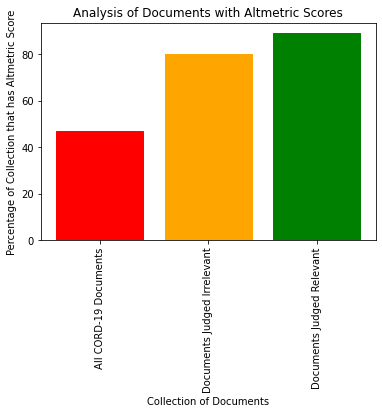

In [ ]:
x = ['All CORD-19 Documents', 'Documents Judged Irrelevant', 'Documents Judged Relevant']
barlist = plt.bar(x, y)
barlist[0].set_color('red')
barlist[1].set_color('orange')
barlist[2].set_color('green')

plt.xticks(rotation=90)
plt.title("Analysis of Documents with Altmetric Scores")
plt.xlabel("Collection of Documents")
plt.ylabel("Percentage of Collection that has Altmetric Score")

In [ ]:
all_scores = []
for altmetric in altmetrics:
  if altmetric is not None:
    all_scores.append(altmetric['score'])

rel_scores = []
for altmetric in relevant_doc_altmetrics:
  if altmetric is not None:
    rel_scores.append(altmetric['score'])

irrel_scores = []
for altmetric in irrelevant_doc_altmetrics:
  if altmetric is not None:
    irrel_scores.append(altmetric['score'])



Text(0, 0.5, 'Number of Documents (Log Transformed)')

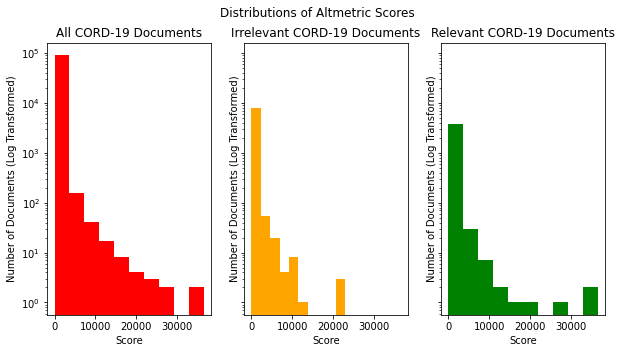

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10,5), sharex=True, sharey=True)
fig.suptitle("Distributions of Altmetric Scores")
ax[0].hist(all_scores, log=True, color='red')
ax[0].set_title("All CORD-19 Documents")
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Number of Documents (Log Transformed)")
ax[1].hist(irrel_scores, log=True, color='orange')
ax[1].set_title("Irrelevant CORD-19 Documents")
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Number of Documents (Log Transformed)")
ax[2].hist(rel_scores, log=True, color='green')
ax[2].set_title("Relevant CORD-19 Documents")
ax[2].set_xlabel("Score")
ax[2].set_ylabel("Number of Documents (Log Transformed)")